# Cat and Dog dataset 
- Images of cat and dog 
- Using CNN models 
- agumenting data using image data generator
- batch normalization, max pooling, dropout

1. Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Colab으로 진행하여 구글 드라이브 mount 하여 zip 해제

In [2]:
import os, shutil
import pandas as pd
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tqdm import tqdm
import numpy as np
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

In [3]:
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'y--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['acc'], 'g-', label = 'acc')
    plt.plot(history.history['val_acc'], 'r--', label = 'val_acc')
    plt.xlabel('Epoch')
    # plt.ylim([0.7, 1])
    plt.legend()

    return plt.show()

In [4]:
cd '/content/drive/MyDrive/Dataset/new'

/content/drive/MyDrive/Dataset/new


In [7]:
original_dataset_dir = '/content/drive/MyDrive/Dataset/train'
base_dir = '/content/drive/MyDrive/Dataset/new'

In [10]:
# The path to the directory where the original
# dataset was uncompressed
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

#train folder
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

#validation folder
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

#test folder
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [8]:
# Check number of data
print('total training cat images:', len(os.listdir("./train/cats")))
print('total training dog images:', len(os.listdir("./train/dogs")))
print('total validation cat images:', len(os.listdir("./validation/dogs")))
print('total validation dog images:', len(os.listdir("./validation/cats")))
print('total test cat images:', len(os.listdir("./test/dogs")))
print('total test dog images:', len(os.listdir("./test/dogs")))

total training cat images: 4583
total training dog images: 4854
total validation cat images: 1000
total validation dog images: 1000
total test cat images: 500
total test dog images: 500


2. Data pre-processing

In [11]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 9437 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


3. Baseline CNN

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - 58s 6s/step - loss: 0.6859 - acc: 0.5500 - val_loss: 0.6800 - val_acc: 0.5640
Epoch 2/30
10/10 [==============================] - 46s 5s/step - loss: 0.6941 - acc: 0.5200 - val_loss: 0.6791 - val_acc: 0.5660
Epoch 3/30
10/10 [==============================] - 39s 4s/step - loss: 0.6694 - acc: 0.5650 - val_loss: 0.7146 - val_acc: 0.4800
Epoch 4/30
10/10 [==============================] - 37s 4s/step - loss: 0.6873 - acc: 0.5300 - val_loss: 0.6700 - val_acc: 0.6310
Epoch 5/30
10/10 [==============================] - 34s 3s/step - loss: 0.6719 - acc: 0.5750 - val_loss: 0.7001 - val_acc: 0.4910
Epoch 6/30
10/10 [==============================] - 36s 4s/step - loss: 0.6792 - acc: 0.5700 - val_loss: 0.6685 - val_acc: 0.6310
Epoch 7/30
10/10 [==============================] - 35s 4s/step - loss: 0.6764 - acc: 0.5800 - val_loss: 0.6637 - val_acc: 0.6440
Epoch 8/30
10/10 [==============================] - 32s 3s/step - loss: 0.6672 - acc: 0.64

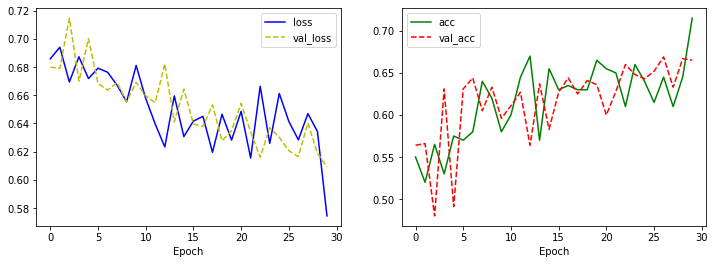

In [19]:
graph()

In [20]:
model.evaluate(test_generator)

25/25 [==============================] - 112s 5s/step - loss: 0.5937 - acc: 0.6500


[0.5937325954437256, 0.6499999761581421]

4. Data augmentation

In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

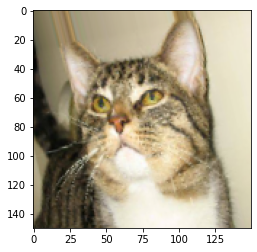

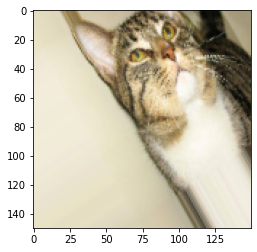

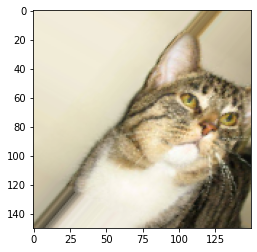

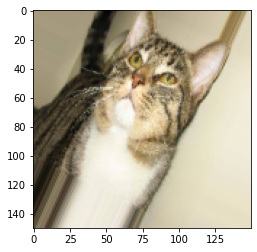

In [22]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[109]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images. 
# It will loop indefinitely, so we need to `break` the loop at some point! 
i= 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 9437 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
10/10 [==============================] - 43s 5s/step - loss: 0.6788 - acc: 0.5688 - val_loss: 0.6914 - val_acc: 0.5038
Epoch 2/100
10/10 [==============================] - 40s 4s/step - loss: 0.6942 - acc: 0.5063 - val_loss: 0.6893 - val_acc: 0.5375
Epoch 3/100
10/10 [==============================] - 40s 4s/step - loss: 0.6935 - acc: 0.5344 - val_loss: 0.6910 - val_acc: 0.5006
Epoch 4/100
10/10 [==============================] - 40s 4s/step - loss: 0.6934 - acc: 0.5250 - val_loss: 0.6940 - val_acc: 0.4913
Epoch 5/100
10/10 [==============================] - 40s 4s/step - loss: 0.6729 - acc: 0.5594 - val_loss: 0.7054 - val_acc: 0.4994
Epoch 6/100
10/10 [==============================] - 40s 4s/step - loss: 0.6894 - acc: 0.5531 - val_loss: 0.6984 - val_acc: 0.5044
Epoch 7/100
10/10 [==============================] - 40s 4s/step - loss: 0.6816 - acc: 0.5562 - val_loss: 0.6889 - val_acc: 0.5013
Epoch 8/100
10/10 [==============================] - 40s 4s/step - loss: 0.6896 - a

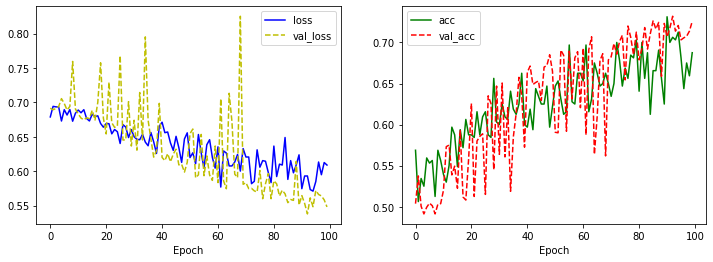

In [26]:
graph()

In [27]:
model.evaluate(test_generator)

16/16 [==============================] - 8s 461ms/step - loss: 0.4586 - acc: 0.7660


[0.45857560634613037, 0.765999972820282]

5. Densenet

In [28]:
feature_model = keras.applications.DenseNet201(input_shape=(224,224,3), weights="imagenet", include_top=False)
feature_model.trainable= False

74850304/74836368 [==============================] - 0s 0us/step


In [29]:
image_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))

valid_generator = train_datagen.flow_from_directory(directory = validation_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))

test_generator = train_datagen.flow_from_directory(directory = test_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))

Found 9437 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
#feature extract 
batch_step = 32
train_features = [] 
train_Y = [] 

for idx in tqdm(range(batch_step)):
    x, y = train_generator.next()
    train_Y.extend(y) 

    feature = feature_model.predict(x)
    train_features.extend(feature)

#Change to array
train_features = np.array(train_features)
train_Y = np.array(train_Y)

print(train_features.shape)
print(train_Y.shape)
print(train_Y)

100%|██████████| 32/32 [05:19<00:00,  9.97s/it]

(1024, 7, 7, 1920)
(1024,)
[1. 1. 0. ... 1. 0. 1.]


In [31]:
valid_features = [] 
valid_Y = [] 

batch_step = 32

for idx in tqdm(range(batch_step)):
    
    x, y = valid_generator.next()
    valid_Y.extend(y)
  
    feature = feature_model.predict(x)
    valid_features.extend(feature)

valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)

print(valid_features.shape)
print(valid_Y.shape)

100%|██████████| 32/32 [05:10<00:00,  9.70s/it]

(1024, 7, 7, 1920)
(1024,)


In [32]:
def build_model(feature_model):
    
    inputs = Input(shape=feature_model.output.shape[1:])
    
    x = GlobalAveragePooling2D()(inputs)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=inputs, outputs = outputs)
    
    init_lr = 0.0001
    opt = Adam(lr=init_lr)
    model.compile(optimizer=opt, 
                  loss= 'binary_crossentropy',
                  metrics='acc')
    
    
    return model

In [33]:
model = build_model(feature_model)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 7, 1920)]      0         
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               245888    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 output (Dense)              (None, 1)                 129   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
checkpoint_path = '/content/drive/My Drive/check22.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_acc',
                                verbose=1)

es = EarlyStopping(patience=20, verbose=1)
history = model.fit(train_features, train_Y, 
                    validation_data=(valid_features, valid_Y),
                    epochs = 50,
                    batch_size = 32,
                    callbacks=[es,cp])
model.summary()

Epoch 1/50
30/32 [===========================>..] - ETA: 0s - loss: 0.4045 - acc: 0.8146
Epoch 1: val_acc improved from -inf to 0.95898, saving model to /content/drive/My Drive/check22.h5
32/32 [==============================] - 1s 28ms/step - loss: 0.3911 - acc: 0.8232 - val_loss: 0.2249 - val_acc: 0.9590
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 0.1487 - acc: 0.9577
Epoch 2: val_acc improved from 0.95898 to 0.96484, saving model to /content/drive/My Drive/check22.h5
32/32 [==============================] - 1s 20ms/step - loss: 0.1462 - acc: 0.9590 - val_loss: 0.1445 - val_acc: 0.9648
Epoch 3/50
30/32 [===========================>..] - ETA: 0s - loss: 0.1001 - acc: 0.9708
Epoch 3: val_acc improved from 0.96484 to 0.96973, saving model to /content/drive/My Drive/check22.h5
32/32 [==============================] - 1s 20ms/step - loss: 0.0977 - acc: 0.9697 - val_loss: 0.1129 - val_acc: 0.9697
Epoch 4/50
29/32 [==========================>...] - ETA: 0s - loss: 0.

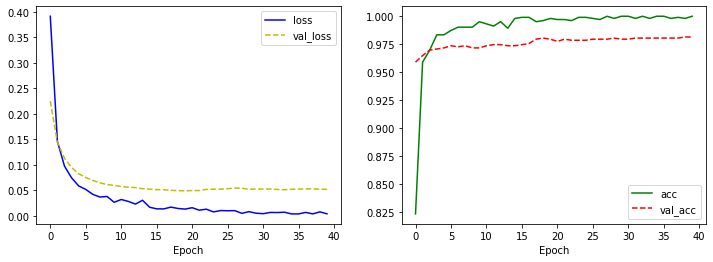

In [35]:
graph()

In [36]:
model.load_weights(checkpoint_path)
model.evaluate(valid_features, valid_Y)

32/32 [==============================] - 0s 8ms/step - loss: 0.0524 - acc: 0.9814


[0.05235280096530914, 0.9814453125]